# Setup

## Import modules

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [2]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_percentage_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL

sys.path.insert(0, './notebooks')

# Number of takeaway places by borough

In [3]:
# load
takeaway_units = pd.read_excel("../data/take-away-borough.xls", sheet_name="Takeaway and food stand units", skiprows=4, names=columns)

# remove missing values
takeaway_units.dropna(axis=0, inplace=True)
takeaway_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,3970.0,4015.0,3935.0,4075.0,4175.0,4240.0,4240.0,4240.0,4255.0,4210.0,4150.0,4400.0,4390.0,4585.0,5190.0,5275.0,5300.0
1,E09000001,City of London,120.0,135.0,130.0,135.0,145.0,145.0,145.0,140.0,135.0,160.0,160.0,160.0,160.0,155.0,150.0,160.0,155.0
2,E09000002,Barking and Dagenham,90.0,95.0,95.0,90.0,90.0,90.0,85.0,95.0,95.0,95.0,95.0,95.0,95.0,105.0,125.0,130.0,135.0
3,E09000003,Barnet,120.0,115.0,120.0,130.0,135.0,140.0,120.0,135.0,140.0,135.0,135.0,140.0,145.0,155.0,165.0,180.0,180.0
4,E09000004,Bexley,105.0,115.0,105.0,105.0,115.0,115.0,120.0,100.0,105.0,100.0,100.0,110.0,100.0,105.0,125.0,135.0,125.0


## Values for growth boroughs

In [4]:
takeaway_units_boroughs = takeaway_units[takeaway_units['Area name'].isin(growth_boroughs)]
takeaway_units_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,90.0,95.0,95.0,90.0,90.0,90.0,85.0,95.0,95.0,95.0,95.0,95.0,95.0,105.0,125.0,130.0,135.0
11,E09000011,Greenwich,85.0,95.0,95.0,100.0,100.0,100.0,110.0,110.0,105.0,105.0,105.0,125.0,115.0,120.0,135.0,135.0,140.0
12,E09000012,Hackney,90.0,90.0,80.0,100.0,105.0,105.0,100.0,100.0,120.0,105.0,100.0,110.0,110.0,130.0,155.0,170.0,175.0
25,E09000025,Newham,105.0,110.0,105.0,110.0,120.0,135.0,125.0,100.0,100.0,100.0,105.0,125.0,130.0,145.0,180.0,190.0,185.0
30,E09000030,Tower Hamlets,105.0,120.0,120.0,120.0,125.0,125.0,130.0,130.0,145.0,145.0,145.0,175.0,170.0,175.0,210.0,220.0,220.0
31,E09000031,Waltham Forest,90.0,90.0,90.0,90.0,95.0,105.0,115.0,105.0,90.0,95.0,100.0,100.0,110.0,120.0,150.0,150.0,155.0


<Figure size 720x432 with 0 Axes>

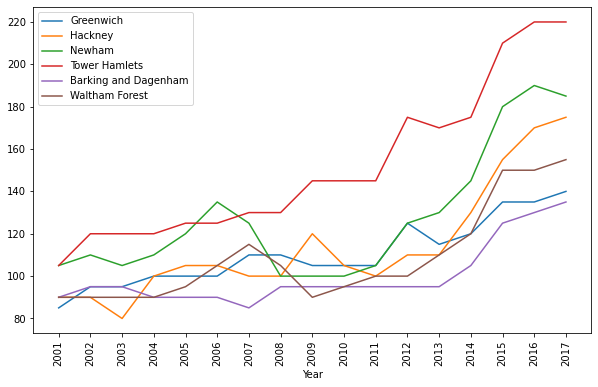

In [5]:
plt.figure(figsize=(10, 6))
plot_boroughs(takeaway_units_boroughs)

## Percentage changes (baseline 2005)

In [6]:
multipliers_2005 = takeaway_units[years].div(takeaway_units["2005"], axis=0)
percentage_changes_num_2005 = multipliers_2005.sub(1)
percentage_changes_2005 = pd.concat([takeaway_units.iloc[:, :2], percentage_changes_num_2005], axis=1)
percentage_changes_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.049102,-0.038323,-0.057485,-0.023952,0.0,0.015569,0.015569,0.015569,0.019162,0.008383,-0.005988,0.053892,0.051497,0.098204,0.243114,0.263473,0.269461
1,E09000001,City of London,-0.172414,-0.068966,-0.103448,-0.068966,0.0,0.000000,0.000000,-0.034483,-0.068966,0.103448,0.103448,0.103448,0.103448,0.068966,0.034483,0.103448,0.068966
2,E09000002,Barking and Dagenham,0.000000,0.055556,0.055556,0.000000,0.0,0.000000,-0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.166667,0.388889,0.444444,0.500000
3,E09000003,Barnet,-0.111111,-0.148148,-0.111111,-0.037037,0.0,0.037037,-0.111111,0.000000,0.037037,0.000000,0.000000,0.037037,0.074074,0.148148,0.222222,0.333333,0.333333
4,E09000004,Bexley,-0.086957,0.000000,-0.086957,-0.086957,0.0,0.000000,0.043478,-0.130435,-0.086957,-0.130435,-0.130435,-0.043478,-0.130435,-0.086957,0.086957,0.173913,0.086957


<Figure size 720x432 with 0 Axes>

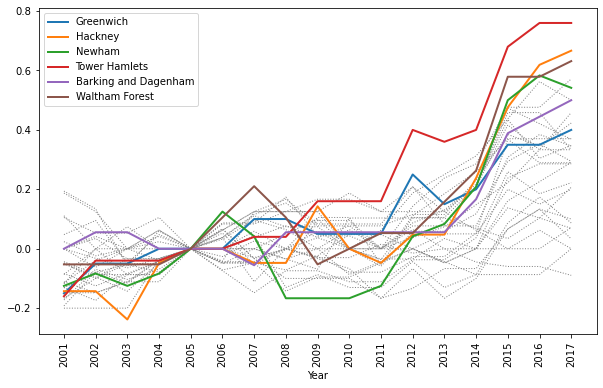

In [7]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2005)

## Percentage changes (baseline 2011)

In [8]:
multipliers_2011 = takeaway_units[years].div(takeaway_units["2011"], axis=0)
percentage_changes_num_2011 = multipliers_2011.sub(1)
percentage_changes_2011 = pd.concat([takeaway_units.iloc[:, :2], percentage_changes_num_2011], axis=1)
percentage_changes_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.043373,-0.032530,-0.051807,-0.018072,0.006024,0.021687,0.021687,0.021687,0.025301,0.014458,0.0,0.060241,0.057831,0.104819,0.250602,0.271084,0.277108
1,E09000001,City of London,-0.250000,-0.156250,-0.187500,-0.156250,-0.093750,-0.093750,-0.093750,-0.125000,-0.156250,0.000000,0.0,0.000000,0.000000,-0.031250,-0.062500,0.000000,-0.031250
2,E09000002,Barking and Dagenham,-0.052632,0.000000,0.000000,-0.052632,-0.052632,-0.052632,-0.105263,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.105263,0.315789,0.368421,0.421053
3,E09000003,Barnet,-0.111111,-0.148148,-0.111111,-0.037037,0.000000,0.037037,-0.111111,0.000000,0.037037,0.000000,0.0,0.037037,0.074074,0.148148,0.222222,0.333333,0.333333
4,E09000004,Bexley,0.050000,0.150000,0.050000,0.050000,0.150000,0.150000,0.200000,0.000000,0.050000,0.000000,0.0,0.100000,0.000000,0.050000,0.250000,0.350000,0.250000


<Figure size 720x432 with 0 Axes>

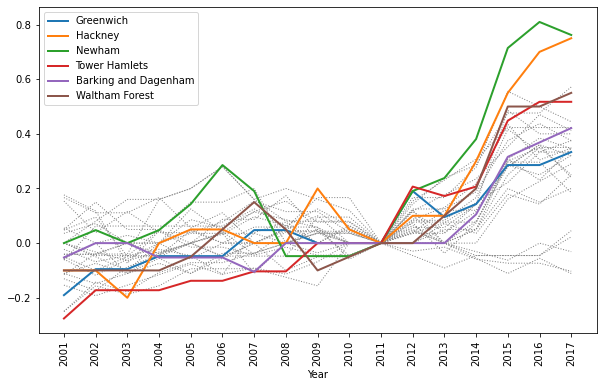

In [9]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2011)

# Number of restaurant employees by borough

In [10]:
# load
takeaway_employees = pd.read_excel("../data/take-away-borough.xls", sheet_name="Takeaway and food stand emp", skiprows=4, names=columns)

# remove missing values
takeaway_employees.dropna(axis=0, inplace=True)
takeaway_employees.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,18300.0,18400.0,17200.0,16300.0,17100.0,18000.0,18500.0,19600.0,20800.0,23000.0,24600.0,27500.0,29400.0,31500.0,35100.0,35000.0,35900.0
1,E09000001,City of London,1100.0,1100.0,1000.0,1000.0,1100.0,1100.0,1100.0,1200.0,1400.0,1500.0,1800.0,1600.0,1600.0,1700.0,1900.0,1900.0,2000.0
2,E09000002,Barking and Dagenham,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,400.0,500.0,600.0,600.0,800.0
3,E09000003,Barnet,600.0,600.0,600.0,500.0,600.0,600.0,600.0,600.0,700.0,700.0,800.0,900.0,1100.0,900.0,1000.0,1100.0,1000.0
4,E09000004,Bexley,400.0,400.0,400.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,400.0,400.0,500.0,600.0,600.0,600.0


## Values for growth boroughs

In [11]:
takeaway_employees_boroughs = takeaway_employees[takeaway_employees['Area name'].isin(growth_boroughs)]
takeaway_employees_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,400.0,500.0,600.0,600.0,800.0
11,E09000011,Greenwich,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,500.0,600.0,700.0,600.0,800.0,900.0,700.0,700.0
12,E09000012,Hackney,300.0,200.0,200.0,300.0,300.0,300.0,300.0,300.0,400.0,400.0,400.0,400.0,500.0,600.0,700.0,800.0,900.0
25,E09000025,Newham,400.0,300.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,500.0,600.0,700.0,800.0,900.0,1100.0,1100.0,1100.0
30,E09000030,Tower Hamlets,500.0,700.0,600.0,500.0,600.0,700.0,600.0,600.0,800.0,900.0,1000.0,1000.0,1100.0,1300.0,1500.0,1600.0,1500.0
31,E09000031,Waltham Forest,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,500.0,500.0,700.0,800.0,800.0,700.0


<Figure size 720x432 with 0 Axes>

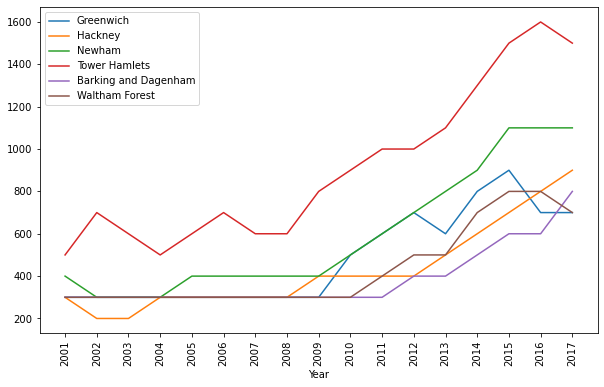

In [12]:
plt.figure(figsize=(10, 6))
plot_boroughs(takeaway_employees_boroughs)

## Percentage changes (baseline 2005)

In [13]:
multipliers_2005 = takeaway_employees[years].div(takeaway_employees["2005"], axis=0)
percentage_changes_num_2005 = multipliers_2005.sub(1)
percentage_changes_2005 = pd.concat([takeaway_employees.iloc[:, :2], percentage_changes_num_2005], axis=1)
percentage_changes_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.070175,0.076023,0.005848,-0.046784,0.0,0.052632,0.081871,0.146199,0.216374,0.345029,0.438596,0.608187,0.719298,0.842105,1.052632,1.046784,1.099415
1,E09000001,City of London,0.000000,0.000000,-0.090909,-0.090909,0.0,0.000000,0.000000,0.090909,0.272727,0.363636,0.636364,0.454545,0.454545,0.545455,0.727273,0.727273,0.818182
2,E09000002,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.666667,1.000000,1.000000,1.666667
3,E09000003,Barnet,0.000000,0.000000,0.000000,-0.166667,0.0,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.500000,0.833333,0.500000,0.666667,0.833333,0.666667
4,E09000004,Bexley,0.333333,0.333333,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.666667,1.000000,1.000000,1.000000


<Figure size 720x432 with 0 Axes>

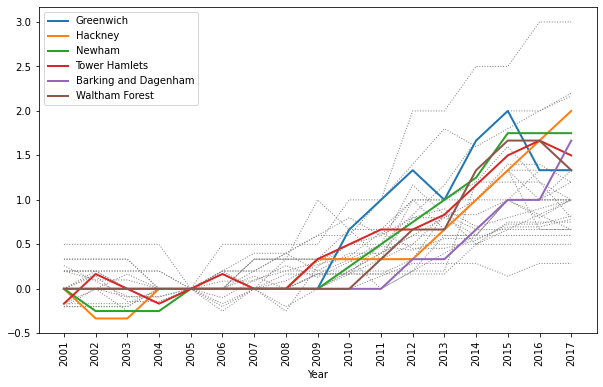

In [14]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2005)

## Percentage changes (baseline 2011)

In [15]:
multipliers_2011 = takeaway_employees[years].div(takeaway_employees["2011"], axis=0)
percentage_changes_num_2011 = multipliers_2011.sub(1)
percentage_changes_2011 = pd.concat([takeaway_employees.iloc[:, :2], percentage_changes_num_2011], axis=1)
percentage_changes_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.256098,-0.252033,-0.300813,-0.337398,-0.304878,-0.268293,-0.247967,-0.203252,-0.154472,-0.065041,0.0,0.117886,0.195122,0.280488,0.426829,0.422764,0.459350
1,E09000001,City of London,-0.388889,-0.388889,-0.444444,-0.444444,-0.388889,-0.388889,-0.388889,-0.333333,-0.222222,-0.166667,0.0,-0.111111,-0.111111,-0.055556,0.055556,0.055556,0.111111
2,E09000002,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.333333,0.666667,1.000000,1.000000,1.666667
3,E09000003,Barnet,-0.250000,-0.250000,-0.250000,-0.375000,-0.250000,-0.250000,-0.250000,-0.250000,-0.125000,-0.125000,0.0,0.125000,0.375000,0.125000,0.250000,0.375000,0.250000
4,E09000004,Bexley,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,0.0,0.000000,0.000000,0.250000,0.500000,0.500000,0.500000


<Figure size 720x432 with 0 Axes>

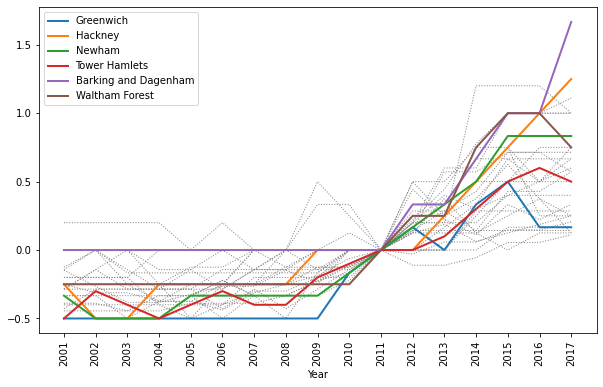

In [16]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2011)